In [1]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
from tqdm.notebook import tqdm, trange
import time  

In [3]:
#get data from security force sqlite database
con = sqlite3.connect('state-department-data.db')
df = pd.read_sql_query('SELECT * FROM [training-data]', con)

con.close()


df.shape


(227832, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227832 entries, 0 to 227831
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   training:id:admin            227832 non-null  object
 1   training:source              227832 non-null  object
 2   qa:training_group            227832 non-null  object
 3   training:country             227832 non-null  object
 4   training:country_iso_3166_1  227832 non-null  object
 5   training:program             227832 non-null  object
 6   training:course_title        227832 non-null  object
 7   training:delivery_unit       227832 non-null  object
 8   training:recipient_unit      227832 non-null  object
 9   qa:training_start_date       227832 non-null  object
 10  training:start_date          227832 non-null  object
 11  qa:training_end_date         227832 non-null  object
 12  training:end_date            227832 non-null  object
 13  training:locat

In [5]:
df.head()

,training:id:admin,training:source,qa:training_group,training:country,training:country_iso_3166_1,training:program,training:course_title,training:delivery_unit,training:recipient_unit,qa:training_start_date,training:start_date,qa:training_end_date,training:end_date,training:location,training:quantity,training:total_cost,qa:training_source_url,training:status:admin,qa:training_date_first_seen,qa:training_date_scraped
0,61547f61-0a99-4d9f-8bf1-a2510a27d9c0,03221d24-92ea-4ccc-a6a2-bd88dbfcd9fb,2001_2002_Africa_fmtrpt.tsv,Angola,AGO,"DoS Africa Region, Angola, Africa Center for S...",Senior Leader Seminar,,Ministry of Foreign Affairs MOD,1/29/01,2001-01-29,2/9/01,2001-02-09,Libreville Gabon,2,9667,https://2009-2017.state.gov/documents/organiza...,Not checked against source; verify accuracy be...,2002-03,2019-07-16
1,f2f32d63-35d9-44d0-b8c6-b3953e501a9f,03221d24-92ea-4ccc-a6a2-bd88dbfcd9fb,2001_2002_Africa_fmtrpt.tsv,Benin,BEN,"DoS Africa Region, Benin, International Milita...",AIRBORNE,,"Army, Ground Forces, 1st Batallion, Combined-Arms",5/7/01,2001-05-07,5/12/01,2001-05-12,FT BENNING GA 31905-5468,1,1296,https://2009-2017.state.gov/documents/organiza...,Not checked against source; verify accuracy be...,2002-03,2019-07-16
2,904cca00-9278-462c-a2eb-47b8f07a6c2c,03221d24-92ea-4ccc-a6a2-bd88dbfcd9fb,2001_2002_Africa_fmtrpt.tsv,Benin,BEN,"DoS Africa Region, Benin, International Milita...",AMERICAN LANGUAGE COURSE,,"Air Force, on training in the US",1/22/01,2001-01-22,6/8/01,2001-06-08,"LACKLAND AFB, TX 78236",1,18241,https://2009-2017.state.gov/documents/organiza...,Not checked against source; verify accuracy be...,2002-03,2019-07-16
3,c4aa4af8-edfa-433b-8464-b5c52a79b201,03221d24-92ea-4ccc-a6a2-bd88dbfcd9fb,2001_2002_Africa_fmtrpt.tsv,Benin,BEN,"DoS Africa Region, Benin, International Milita...",AMERICAN LANGUAGE COURSE,,on training in the US,4/9/01,2001-04-09,8/24/01,2001-08-24,"LACKLAND AFB, TX 78236",1,13944,https://2009-2017.state.gov/documents/organiza...,Not checked against source; verify accuracy be...,2002-03,2019-07-16
4,44113026-31cf-4455-a8de-27910354348b,03221d24-92ea-4ccc-a6a2-bd88dbfcd9fb,2001_2002_Africa_fmtrpt.tsv,Benin,BEN,"DoS Africa Region, Benin, International Milita...",AMERICAN LANGUAGE CRS,,"Navy, Posted at General Chief of Staff Headqua...",5/7/01,2001-05-07,9/21/01,2001-09-21,"LACKLAND AFB, TX 78236-5259",1,14044,https://2009-2017.state.gov/documents/organiza...,Not checked against source; verify accuracy be...,2002-03,2019-07-16


In [6]:
df.describe()

,training:id:admin,training:source,qa:training_group,training:country,training:country_iso_3166_1,training:program,training:course_title,training:delivery_unit,training:recipient_unit,qa:training_start_date,training:start_date,qa:training_end_date,training:end_date,training:location,training:quantity,training:total_cost,qa:training_source_url,training:status:admin,qa:training_date_first_seen,qa:training_date_scraped
count,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832,227832
unique,227832,19,112,233,187,3000,13964,2803,69617,6165,6066,6229,6217,4056,589,39800,87,1,19,3
top,61547f61-0a99-4d9f-8bf1-a2510a27d9c0,4189374e-437e-49a6-a769-023b2b22de02,2005_2006_All_Regions_fmtrpt.tsv,Colombia,COL,IMET-1 - Fiscal Year 2010 Department of State ...,MET DIILS SEMINARS,,,,,,,"Lackland AFB, TX, US",1,0,https://www.state.gov/wp-content/uploads/2021/...,Not checked against source; verify accuracy be...,2011,2019-07-16
freq,1,19671,9757,20010,20010,7586,2000,41500,5381,1630,1660,1581,1581,7225,191562,42363,14229,227832,19671,201699


In [7]:
df.columns

Index(['training:id:admin', 'training:source', 'qa:training_group',
       'training:country', 'training:country_iso_3166_1', 'training:program',
       'training:course_title', 'training:delivery_unit',
       'training:recipient_unit', 'qa:training_start_date',
       'training:start_date', 'qa:training_end_date', 'training:end_date',
       'training:location', 'training:quantity', 'training:total_cost',
       'qa:training_source_url', 'training:status:admin',
       'qa:training_date_first_seen', 'qa:training_date_scraped'],
      dtype='object')

In [8]:
df.dtypes

training:id:admin              object
training:source                object
qa:training_group              object
training:country               object
training:country_iso_3166_1    object
training:program               object
training:course_title          object
training:delivery_unit         object
training:recipient_unit        object
qa:training_start_date         object
training:start_date            object
qa:training_end_date           object
training:end_date              object
training:location              object
training:quantity              object
training:total_cost            object
qa:training_source_url         object
training:status:admin          object
qa:training_date_first_seen    object
qa:training_date_scraped       object
dtype: object

In [9]:
#drop the id columns and almost all urls, save one for checking source
df = df.drop(labels=['training:source','training:id:admin','qa:training_date_scraped',
                     'qa:training_date_first_seen','training:status:admin'],axis=1)

In [10]:
df['training:total_cost'] = pd.to_numeric(df['training:total_cost'])
df.rename(columns = {'training:total_cost':'cost'},inplace=True) 

In [11]:
#investigate training quantity issues
pd.options.display.max_colwidth = 250
print(df[df['training:quantity'] == '1 39529-7099']['qa:training_source_url'])
#zip code is reading as part of quantity
df.loc[df['training:quantity'] == '1 39529-7099','training:quantity'] = 1
df.loc[df['training:quantity'] == '39529-7099','training:quantity'] = 1

for quantity in tqdm(df['training:quantity']):
    if type(quantity) != int:
        df.loc[df['training:quantity'] == quantity,'training:quantity'] = quantity.split(' ')[0]
df['training:quantity'] = pd.to_numeric(df['training:quantity'],errors='coerce')

df.rename(columns = {'training:quantity':'quantity'},inplace=True) 


7489     https://2009-2017.state.gov/documents/organization/21817.pdf
7600     https://2009-2017.state.gov/documents/organization/21817.pdf
8391     https://2009-2017.state.gov/documents/organization/21818.pdf
12345    https://2009-2017.state.gov/documents/organization/21823.pdf
12346    https://2009-2017.state.gov/documents/organization/21823.pdf
                                     ...                             
14796    https://2009-2017.state.gov/documents/organization/21823.pdf
14797    https://2009-2017.state.gov/documents/organization/21823.pdf
14798    https://2009-2017.state.gov/documents/organization/21823.pdf
14799    https://2009-2017.state.gov/documents/organization/21823.pdf
15037    https://2009-2017.state.gov/documents/organization/21823.pdf
Name: qa:training_source_url, Length: 96, dtype: object


  0%|          | 0/227832 [00:00<?, ?it/s]

In [12]:
df.quantity.isna().sum()

1121

In [13]:
#check number of unique countries vs iso codes for countries
print(df['training:country'].value_counts())
print(df['training:country'].nunique())

print(df['training:country_iso_3166_1'].value_counts())
print(df['training:country_iso_3166_1'].nunique())

#countries is a more useful metric than iso codes, which are incomplete

#rename countries, drop iso codes
df.drop(labels = 'training:country_iso_3166_1', axis = 1, inplace = True)
df.rename(columns = {'training:country':'country'}, inplace = True)

Colombia          20010
Egypt             11671
Jordan             7689
Israel             6825
Mexico             6200
                  ...  
Liechtenstein         1
Sint Maarten          1
Indochina             1
Cayman Islands        1
Aruba                 1
Name: training:country, Length: 233, dtype: int64
233
COL    20010
EGY    11671
JOR     7689
ISR     6825
MEX     6200
       ...  
0          3
PYF        2
MCO        2
NCL        2
TKL        2
Name: training:country_iso_3166_1, Length: 187, dtype: int64
187


In [14]:
df.rename(columns = {'qa:training_group':'training_group',
                     'training:program':'program','qa:training_source_url':'url',
                    'training:course_title':'course_name','training:delivery_unit':'deliv_unit',
                    'training:recipient_unit':'recip_unit','training:location':'location'},
          inplace = True)

In [15]:
df.columns

Index(['training_group', 'country', 'program', 'course_name', 'deliv_unit',
       'recip_unit', 'qa:training_start_date', 'training:start_date',
       'qa:training_end_date', 'training:end_date', 'location', 'quantity',
       'cost', 'url'],
      dtype='object')

In [16]:

#convert all relevant objects to datetimes
df[["training:start_date", "training:end_date", "qa:training_start_date", "qa:training_end_date"]] = df[["training:start_date", "training:end_date",
                                                                                                         "qa:training_start_date", "qa:training_end_date"]].apply(
    pd.to_datetime, errors = 'coerce')



In [17]:
#compare start-date and qa start date columns
df['start_changed'] = np.where(df['training:start_date']!=df['qa:training_start_date'], 
                                          1, 0)
print(df[df['start_changed'] ==1 & pd.notnull(df['training:start_date'])].shape)
print(df[df['start_changed'] ==1 & pd.notnull(df['qa:training_start_date'])].shape)
#the start date and qa start date columns are the same


#compare end-date and qa end date columns
df['end_changed'] = np.where(df['training:end_date']!=df['qa:training_end_date'], 
                                          1, 0)
print(df[df['end_changed'] == 1 & pd.notnull(df['training:end_date'])].shape)
print(df[df['end_changed'] ==1 & pd.notnull(df['qa:training_end_date'])].shape)

#end date column has 15 rows more information than qa end date

df.drop(labels = ['end_changed', 'start_changed'], axis = 1, inplace = True)

#delete qa columns

df.drop(labels = ["qa:training_start_date","qa:training_end_date"], axis = 1, inplace = True)

(0, 15)
(0, 15)
(15, 16)
(0, 16)


In [18]:
df.rename(columns = {'training:start_date':'start_date',
                     'training:end_date':'end_date'},inplace=True)


In [19]:
#prune obviously mistaken dates

print(min(df['start_date']))
print(max(df['start_date']))

print(min(df['end_date']))
print(max(df['end_date']))

df['start_date'].describe(datetime_is_numeric=True)

1900-01-03 00:00:00
2207-05-30 00:00:00
2000-10-02 00:00:00
2019-09-30 00:00:00


count                           226170
mean     2010-09-27 20:05:08.666931712
min                1900-01-03 00:00:00
25%                2007-01-10 00:00:00
50%                2010-06-14 00:00:00
75%                2015-02-17 00:00:00
max                2207-05-30 00:00:00
Name: start_date, dtype: object

In [20]:
df.loc[df['start_date'].dt.year <2000,'start_date'] = df.loc[df['start_date'].dt.year <2000,'start_date'].apply(
    lambda x:x.replace(year=2007))

df[df['start_date'].dt.year>2019][['start_date','end_date']]
df.loc[df['start_date'].dt.year ==2207,'start_date'] = df.loc[df['start_date'].dt.year <2000,'start_date'].apply(
    lambda x:x.replace(year=2007))
df.loc[df['start_date'].dt.year ==2107,'start_date'] = df.loc[df['start_date'].dt.year <2000,'start_date'].apply(
    lambda x:x.replace(year=2017))
df.loc[df['start_date'].dt.year ==2049,'start_date'] = df.loc[df['start_date'].dt.year <2000,'start_date'].apply(
    lambda x:x.replace(year=2019))
df.loc[df['start_date'].dt.year ==2109,'start_date'] = df.loc[df['start_date'].dt.year <2000,'start_date'].apply(
    lambda x:x.replace(year=2019))
df.loc[df['start_date'].dt.year ==2020,'start_date'] = df.loc[df['start_date'].dt.year <2000,'start_date'].apply(
    lambda x:x.replace(year=2019))

In [21]:
#add training length
df['training_length'] = (df['end_date'] - df['start_date']).apply(lambda x: x/np.timedelta64(1,'D'))

#drop errors where end date is before start date
df.drop(df[df['training_length'] < 0].index, inplace = True)




In [22]:
df['training_length'].describe()

count    225919.000000
mean         47.365773
std          73.567559
min           0.000000
25%           5.000000
50%          18.000000
75%          60.000000
max        2097.000000
Name: training_length, dtype: float64

In [23]:
#add simple year column
df['start_year'] = df['start_date'].dt.year

df['start_month'] = df['start_date'].dt.month

In [24]:
df.columns

Index(['training_group', 'country', 'program', 'course_name', 'deliv_unit',
       'recip_unit', 'start_date', 'end_date', 'location', 'quantity', 'cost',
       'url', 'training_length', 'start_year', 'start_month'],
      dtype='object')

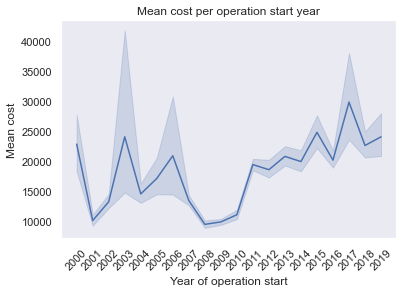

In [25]:
sns.lineplot(x='start_year',y='cost',estimator='mean',data=df)
plt.grid()
plt.xlabel('Year of operation start')
plt.ylabel('Mean cost')
plt.xticks(range(2000,2020),rotation=45)
plt.title('Mean cost per operation start year')
plt.show()

There are evident differences in some years that can be understood as part of large-scale political events (the Iraq war for example is obvious visible in this graph, as is the beginning of the Obama presidency with it's commitment to lowering America's military presence and budget abroad). There doesn't seem to be a linear trend, but year obviously affects the distribution of costs.

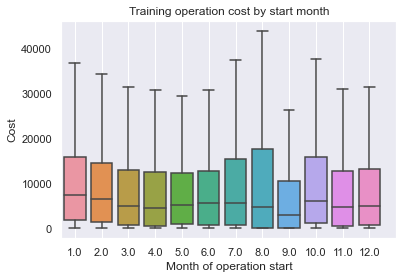

In [26]:
sns.boxplot(x='start_month',y='cost',data=df,showfliers=False)
plt.grid()
plt.xlabel('Month of operation start')
plt.ylabel('Cost')
plt.xticks(range(0,13))
plt.title('Training operation cost by start month')
plt.show()

The cost is somewhat differently distributed by month. Perhaps this has to do with the US government calendar in some way.

In [27]:
df.columns

Index(['training_group', 'country', 'program', 'course_name', 'deliv_unit',
       'recip_unit', 'start_date', 'end_date', 'location', 'quantity', 'cost',
       'url', 'training_length', 'start_year', 'start_month'],
      dtype='object')

[]

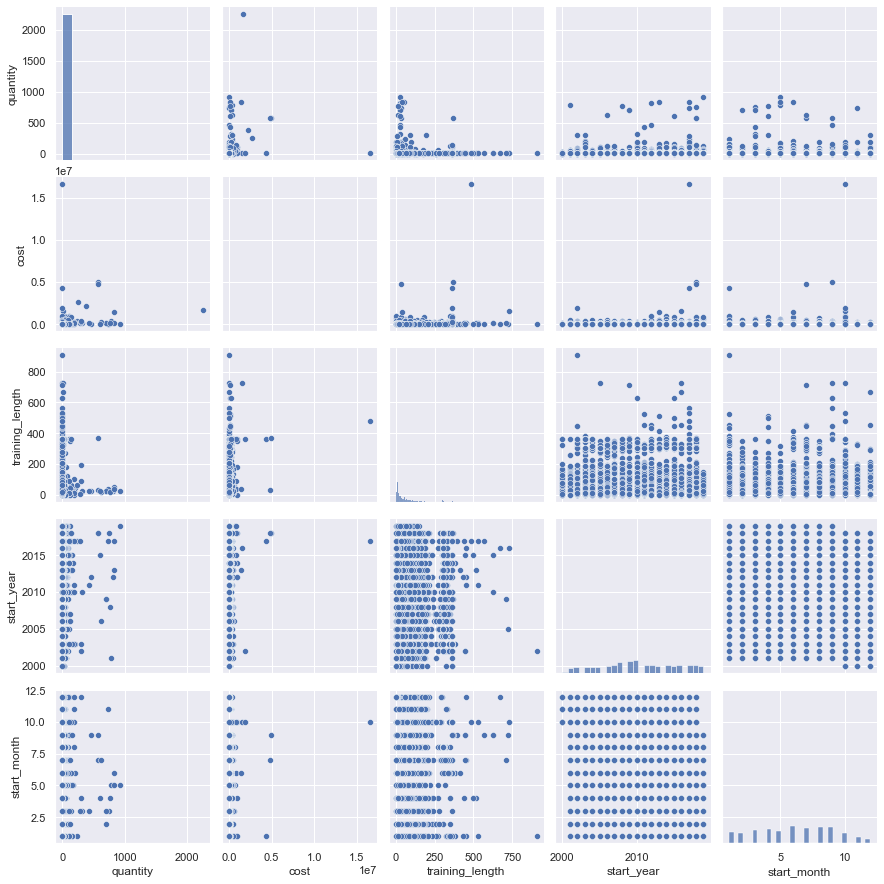

In [28]:
#PAIRPLOT [take a sample so it won't take too long]
sns.pairplot(df.sample(10000))
plt.plot()

We can see that our main numeric factors are very very right-skewed (cost, training length, quantity). This makes it difficult to see much on the pairplots at this time.

Quantity can be better imagined as a boolean, as one accounts for the vast majority of results.


In [29]:
df['quant_one'] = (df['quantity']==1).astype(int)

We will take the log of the training length (+1) in order to normalize the distribution.

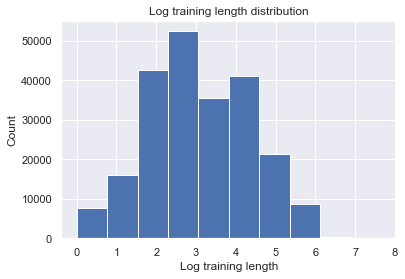

In [30]:
df['log_training_length'] = np.log(df['training_length']+1)
df['log_training_length'].hist()
plt.xlabel('Log training length')
plt.ylabel('Count')
plt.title('Log training length distribution')
plt.show()

In [31]:
df = df.drop(labels='training_length',axis=1)

In [32]:
#group data by training group regions regardless of year
df['training_group'] = df['training_group'].map(lambda entry: entry[10:][:-11])
df['training_group'].value_counts()


Western_Hemisphere          66080
Near_East                   42926
Africa                      36923
Europe                      24552
East_Asia_and_Pacific       19790
South_Central_Asia          19266
All_Regions                  9756
East_Asia_And_Pacific        4402
South_Asia                   2747
Newly_Independent_States     1204
Name: training_group, dtype: int64

In [33]:
df.groupby('training_group')['country'].nunique()

training_group
Africa                       70
All_Regions                 138
East_Asia_And_Pacific        35
East_Asia_and_Pacific        47
Europe                       44
Near_East                    21
Newly_Independent_States     12
South_Asia                   14
South_Central_Asia           14
Western_Hemisphere           48
Name: country, dtype: int64

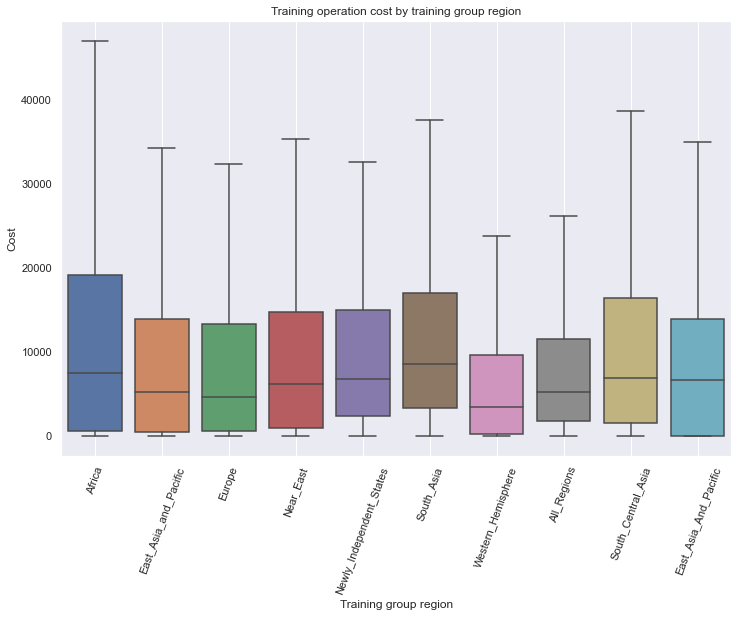

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x='training_group',y='cost',data=df,showfliers=False)
plt.grid()
plt.xlabel('Training group region')
plt.ylabel('Cost')
plt.xticks(rotation=70)
plt.title('Training operation cost by training group region')
plt.show()

There are some extreme cost outliers that we ignore in the above plots. The cost seems to be distributed differently based on training group region.

We will drop our most extreme cost outliers from the dataset – there are many force majeure situations in politics that could lead to extremely high costs for varying political and military reasons that would be much more difficult to model or predict. The inclusion of this data will only distort the modeling of our primary area of interest: the commonplace foreign military training operations that the US undertakes regularly, consistently, and thereby significantly more predictably, as a part of consistent foreign policy and defence strategy and commitments over the last 20 years.

In [35]:
#get rid of crazy cost outliers and nas
df.dropna(subset=['cost'],inplace=True)

In [36]:
df.isna().sum()

training_group           0
country                  0
program                  0
course_name              0
deliv_unit               0
recip_unit               0
start_date             589
end_date               570
location                 0
quantity               202
cost                     0
url                      0
start_year             589
start_month            589
quant_one                0
log_training_length    597
dtype: int64

In [37]:
print(df['cost'].skew())
lower_limit = df['cost'].quantile(0.1)
upper_limit = df['cost'].quantile(0.9)

182.26981983242646


In [38]:
index = df[(df['cost'] > upper_limit)|(df['cost'] < lower_limit)].index
df.drop(index, inplace=True)

In [39]:
df['cost'].describe()


count    199296.000000
mean       6523.239199
std        7116.406399
min           0.000000
25%         394.000000
50%        4013.000000
75%       10434.000000
max       29155.000000
Name: cost, dtype: float64

In [40]:
df['cost'].skew()

1.1411531288963346

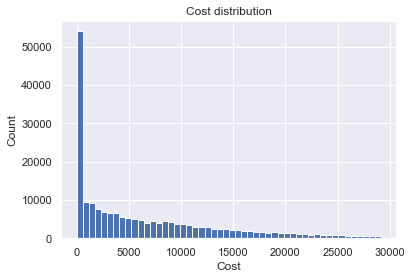

In [41]:
df['cost'].hist(bins=50)
plt.xlabel('Cost')
plt.ylabel('Count')
plt.title('Cost distribution')
plt.show()

We will further take the square root in order to create a more normal distribution.

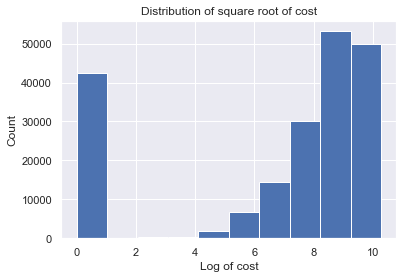

In [43]:
(np.log(df.cost+1)).hist()
plt.xlabel('Log of cost')
plt.ylabel('Count')
plt.title('Distribution of square root of cost')
plt.show()


A graph of the logs of cost makes it clear that this is zero-inflated data. We will keep this in mind later when moving forward into modeling.

In [44]:


#upper case the strings
df['course_name'] = df['course_name'].str.upper()
df['location'] = df['location'].str.upper()
df['deliv_unit'] = df['deliv_unit'].str.upper()
df['recip_unit'] = df['recip_unit'].str.upper()

In [45]:
df.deliv_unit.value_counts()


                                                             38600
US UNIT NOT SPECIFIED IN 2010-2011 REPORT                    18640
US UNIT NOT SPECIFIED IN 2008-2009 REPORT                    16017
US UNIT NOT SPECIFIED IN 2009-2010 REPORT                    15972
US UNIT NOT SPECIFIED IN 2007-2008 REPORT                    10341
                                                             ...  
FLIGHT SAFETY INTERNATIONAL LEARN CENTER - SAN ANTONIO TX        1
48TH IBCT, GAANG - 18                                            1
SOCNORTH - 6                                                     1
NAVEUR - 3                                                       1
CJTF-HOA - 12                                                    1
Name: deliv_unit, Length: 1601, dtype: int64

In [46]:
ix = df['deliv_unit'].dropna().str.contains('US UNIT NOT SPECIFIED')
df.loc[ix, 'deliv_unit'] = pd.NA

In [47]:
df.loc[df['deliv_unit'] == '', 'deliv_unit'] = pd.NA
df.loc[df['deliv_unit'] == 'N/A', 'deliv_unit'] = pd.NA
df.loc[df['deliv_unit'] == '-', 'deliv_unit'] = pd.NA


In [48]:
#create boolean for specified delivery unit
df['has_deliv'] = df['deliv_unit'].notna().astype('int')

In [49]:
#clean recipient units
df.recip_unit.value_counts().head(15)


ARMY                                                    3960
                                                        3947
AIR FORCE                                               3773
MINISTRY OF DEFENSE                                     3115
NAVY                                                    2877
N/A                                                     2835
SEMAR                                                   1597
MOD                                                     1396
COLOMBIAN NATIONAL POLICE, AIR SERVICE                  1316
ESDEGUE                                                 1137
SEDENA                                                  1102
MINISTRY OF FOREIGN AFFAIRS                              874
COLOMBIAN NATIONAL POLICE, ANTINARCOTICS DIRECTORATE     855
COLOMBIAN NATIONAL POLICE, CARABINERO                    793
EGYPTIAN ARMY                                            668
Name: recip_unit, dtype: int64

In [50]:
#clean the recipient unit unknowns
df.loc[df['recip_unit'] == 'N/A', 'recip_unit'] = pd.NA
df.loc[df['recip_unit'] == '', 'recip_unit'] = pd.NA


In [51]:
#create dummies for main programs
df.program.value_counts()
df['DOS'] = df['program'].str.contains('DoS|DOS|Department of State').astype(int)
df['DOD'] = df['program'].str.contains('DoD|DOD|Department of Defense').astype(int)
df['IMET'] = df['program'].str.contains('IMET').astype(int)
df['FMF'] = df['program'].str.contains('FMF').astype(int)
df['CTFP'] = df['program'].str.contains('CTFP').astype(int)
df['Regional_Center'] = df['program'].str.contains('Regional Centers|CHDS|ACSS|NESA').astype(int)

df = df.drop(labels='program',axis=1)

In [52]:

#create dummies for the most general courses
df['language_course'] = df['course_name'].str.contains(' ENG |AMERICAN|ENGLISH|LANGUAGE').astype(int)
df['MET'] = df['course_name'].str.contains('MET').astype(int)
df['MTT'] = df['course_name'].str.contains('MTT').astype(int)
df['seminar'] = df['course_name'].str.contains('SEMINAR').astype(int)
df['terrorism'] = df['course_name'].str.contains('TERROR').astype(int)
df['human_rights'] = df['course_name'].str.contains('HUMAN RIGHTS').astype(int)
df['conference'] = df['course_name'].str.contains('CONFERENCE').astype(int)
df['relations'] = df['course_name'].str.contains('RELATIONS').astype(int)
df['policy'] = df['course_name'].str.contains('POLICY').astype(int)



In [53]:
df = df.drop(labels='course_name',axis=1)

In [54]:


#create a list of all countries except US
from country_list import countries_for_language
countries = dict(countries_for_language('en'))
countries.pop('US')


'United States'

In [55]:
countries_list = []
for country in countries.values():
    countries_list.append(country)

In [56]:
df['location'] = df['location'].str.lower().str.title()
df['in_US'] = (df['location'].str.contains('In Country').astype(int) != 1).astype(int)

In [57]:
print(df['in_US'].sum())


177859


In [58]:
in_US = df['in_US']
for ix in tqdm(range(len(df))):
    location = df.iloc[ix]['location']
    if location == '':
        in_US.iloc[ix] = pd.NA
    else:
        for country in countries_list:
            if country in location:
                in_US.iloc[ix] = 0


  0%|          | 0/199296 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [59]:
df['in_US'] = in_US

In [60]:
df['in_US'].sum()

151535

In [61]:
df.columns

Index(['training_group', 'country', 'deliv_unit', 'recip_unit', 'start_date',
       'end_date', 'location', 'quantity', 'cost', 'url', 'start_year',
       'start_month', 'quant_one', 'log_training_length', 'has_deliv', 'DOS',
       'DOD', 'IMET', 'FMF', 'CTFP', 'Regional_Center', 'language_course',
       'MET', 'MTT', 'seminar', 'terrorism', 'human_rights', 'conference',
       'relations', 'policy', 'in_US'],
      dtype='object')

In [62]:
df = df.drop(labels='url',axis=1)

In [63]:
df = df.drop(labels='location',axis=1)

In [64]:
df.isna().sum()

training_group              0
country                     0
deliv_unit             116704
recip_unit               6782
start_date                176
end_date                  163
quantity                  182
cost                        0
start_year                176
start_month               176
quant_one                   0
log_training_length       184
has_deliv                   0
DOS                         0
DOD                         0
IMET                        0
FMF                         0
CTFP                        0
Regional_Center             0
language_course             0
MET                         0
MTT                         0
seminar                     0
terrorism                   0
human_rights                0
conference                  0
relations                   0
policy                      0
in_US                    2597
dtype: int64

In [65]:
#drop the rows missing date information,quantity,location information
df = df.dropna(subset=['log_training_length','in_US','quantity'])
df = df.drop(labels='quantity',axis=1)

In [66]:
df.isna().sum()

training_group              0
country                     0
deliv_unit             113934
recip_unit               6071
start_date                  0
end_date                    0
cost                        0
start_year                  0
start_month                 0
quant_one                   0
log_training_length         0
has_deliv                   0
DOS                         0
DOD                         0
IMET                        0
FMF                         0
CTFP                        0
Regional_Center             0
language_course             0
MET                         0
MTT                         0
seminar                     0
terrorism                   0
human_rights                0
conference                  0
relations                   0
policy                      0
in_US                       0
dtype: int64

In [67]:
df.recip_unit.nunique()

56510

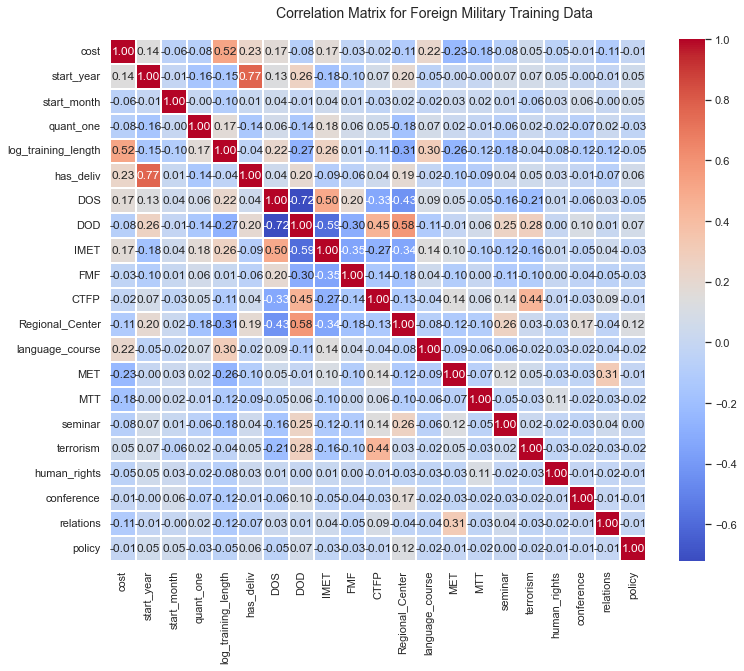

In [68]:
#correlation matrix 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Matrix for Foreign Military Training Data', fontsize=14)

In [69]:
df.shape

(196487, 28)

In [70]:
# save the data to a new csv file
df.to_csv('mil_data_cleaned.csv',index=False)




There were originally 227832 rows x 20 columns worth of data. The cleaned data includes 196487 rows x 28 columns. 

We removed rows lacking date information, quantity information, location information, and total cost information, as well as the extreme total cost outliers.

We dropped columns that contained features without any use, such as urls and scraping dates, as well as duplicate columns for country and start/end dates. We edited data to clean mistakes made when transfering data from the source material (US gov pdfs) to the database where we found it, such as typos in start/end-dates and quantity.

We created a new variable for the length of the operation and then normalized it using logs. 

We created a boolean dummy for quantity, as the vast majority of quantity was equal to 1.

We created new dummy columns to track the most important aspects of our most high cardinality features: location and group name. This included columns to track whether an operation was a part of the Department of Defence or Department of State umbrella, or both, what programs it was a part of (IMET, FMF, CTFP, Regional Center programs), and also some information on what kind of program it was (MET, MTT, a seminar or conference, focused on terrorism, human rights, policy, or relations). We also added a new column based on the information from the training group  column to give regional training group information.

At this point, we have several features that could potentially play a role in predicting total cost, including  program length, whether or not it was associated with a particular delivery unit, as well as various program types and focuses. We will further examine the role regional information and perhaps particularities of delivery unit have on program cost, but due to the high cardinality of this categorical data, we can't easily visualize the role these features play. 

We should take note that our target feature (cost) is zero-inflated.